# Recurrent Neural Network 2.0

### Features

* New Learning Laws
* Previous weights are saved in oprder to keep training the neural network
* I use EMG signals to predig the angle

## Another way of developing the learning law

If we develop the learning laws for a recurrent neural network, we turn out to the following struture

__Note in here, the identification error is $\Delta(k) = x(k)-\hat{x}(k)$__

\begin{array}{c}
tr\left\{ \check{W}_{i}^{\intercal}(k)\left(g_{i}\left[W_{i}\left(k+1\right)-W_{i}\left(k\right)\right]+P_{i,1}\check{W}_{i}(k)\varPsi_{i}\varPsi_{i}^{\top}-PA\Delta(k)\varPsi_{i}^{\top}\right)\right\} =0;\quad i=\{1,2\}\\
\varPsi_{1}=\sigma(\hat{x}(k));\quad\varPsi_{2}=\varphi(\hat{x}(k))u(k)
\end{array}

Then, we can use the following equivalence for making those trace as zero

\begin{equation}
\begin{array}{c}
tr\left\{ \left[\begin{array}{cc}
\check{W}_{i}^{\intercal} & 0\\
0 & \check{W}_{i}^{\intercal}
\end{array}\right]\Theta\right\} =0;\\
\Theta=\left[\begin{array}{c}
\sqrt{g_{i}}I\\
P_{i,1}
\end{array}\right]W_{i}\left(k+1\right)\left[\begin{array}{cc}
\sqrt{g_{i}}I & {\displaystyle \frac{\varPsi_{i}\varPsi_{i}^{\top}}{2}}\end{array}\right]+\left[\begin{array}{c}
-\sqrt{g_{i}}I\\
P_{i,1}
\end{array}\right]W_{i}\left(k\right)\left[\begin{array}{cc}
\sqrt{g_{i}}I & {\displaystyle \frac{\varPsi_{i}\varPsi_{i}^{\top}}{2}}\end{array}\right]-\left[\begin{array}{cc}
G & -\sqrt{g_{i}}W_{i}(k){\displaystyle \frac{\varPsi_{i}\varPsi_{i}^{\top}}{2}}+\partial G\\
\sqrt{g_{i}}PW_{i}(k)+\partial G & G
\end{array}\right]\\
G={\displaystyle \frac{PA\Delta(k)\varPsi_{i}^{\top}}{2};}
\end{array}
\end{equation}

Grouping terms

\begin{equation}
\begin{array}{c}
\Theta=\left[\begin{array}{c}
\sqrt{g_{i}}I\\
P_{i,1}
\end{array}\right]W_{i}\left(k+1\right)\left[\begin{array}{cc}
\sqrt{g_{i}}I & {\displaystyle \frac{\varPsi_{i}\varPsi_{i}^{\top}}{2}}\end{array}\right]+R=0;\\
R=\left[\begin{array}{c}
-\sqrt{g_{i}}I\\
P_{i,1}
\end{array}\right]W_{i}\left(k\right)\left[\begin{array}{cc}
\sqrt{g_{i}}I & {\displaystyle \frac{\varPsi_{i}\varPsi_{i}^{\top}}{2}}\end{array}\right]-\left[\begin{array}{cc}
G & -\sqrt{g_{i}}W_{i}(k){\displaystyle \frac{\varPsi_{i}\varPsi_{i}^{\top}}{2}}+\partial G\\
\sqrt{g_{i}}PW_{i}(k)+\partial G & G
\end{array}\right];\\
R=\left[\begin{array}{cc}
-g_{i}W_{i}(k) & -\sqrt{g_{i}}W_{i}(k){\displaystyle \frac{\varPsi_{i}\varPsi_{i}^{\top}}{2}}\\
\sqrt{g_{i}}PW_{i}(k) & P_{i,1}W_{i}(k){\displaystyle \frac{\varPsi_{i}\varPsi_{i}^{\top}}{2}}
\end{array}\right]+\left[\begin{array}{cc}
-G & \sqrt{g_{i}}W_{i}(k){\displaystyle \frac{\varPsi_{i}\varPsi_{i}^{\top}}{2}}-\partial G\\
-\sqrt{g_{i}}PW_{i}(k)-\partial G & -G
\end{array}\right];\\
R=\left[\begin{array}{cc}
-g_{i}W_{i}(k)-G & -\partial G\\
-\partial G & P_{i,1}W_{i}(k){\displaystyle \frac{\varPsi_{i}\varPsi_{i}^{\top}}{2}}-G
\end{array}\right]
\end{array}
\end{equation}


We can now follow the next steps to obtain the learning laws for the weights. First we multiply by a term to cancel the right hand elements of $W_{i}(k+1)$
\begin{equation}
\begin{array}{c}
\left(\left[\begin{array}{cc}
\sqrt{g_{i}}I & P_{i,1}\end{array}\right]\left[\begin{array}{c}
\sqrt{g_{i}}I\\
P_{i,1}
\end{array}\right]\right)^{-1}\left[\begin{array}{cc}
\sqrt{g_{i}}I & P_{i,1}\end{array}\right]\left[\begin{array}{c}
\sqrt{g_{i}}I\\
P_{i,1}
\end{array}\right]W_{i}\left(k+1\right)\left[\begin{array}{cc}
\sqrt{g_{i}}I & {\displaystyle \frac{\varPsi_{i}\varPsi_{i}^{\top}}{2}}\end{array}\right]=-\left(\left[\begin{array}{cc}
\sqrt{g_{i}}I & P_{i,1}\end{array}\right]\left[\begin{array}{c}
\sqrt{g_{i}}I\\
P_{i,1}
\end{array}\right]\right)^{-1}\left[\begin{array}{cc}
\sqrt{g_{i}}I & P_{i,1}\end{array}\right]R\\
W_{i}\left(k+1\right)\left[\begin{array}{cc}
\sqrt{g_{i}}I & {\displaystyle \frac{\varPsi_{i}\varPsi_{i}^{\top}}{2}}\end{array}\right]=-\left(\left[\begin{array}{cc}
\sqrt{g_{i}}I & P_{i,1}\end{array}\right]\left[\begin{array}{c}
\sqrt{g_{i}}I\\
P_{i,1}
\end{array}\right]\right)^{-1}\left[\begin{array}{cc}
\sqrt{g_{i}}I & P_{i,1}\end{array}\right]R
\end{array}
\end{equation}



The above euation can be rearrange as

\begin{equation}
\begin{array}{c}
W_{i}\left(k+1\right)\left[\begin{array}{cc}
\sqrt{g_{i}}I & {\displaystyle \frac{\varPsi_{i}\varPsi_{i}^{\top}}{2}}\end{array}\right]=-\left(g_{i}I+P_{i,1}^{2}\right)^{-1}\left[\begin{array}{cc}
\sqrt{g_{i}}I & P_{i,1}\end{array}\right]R\end{array}
\end{equation}

The same procedure is for the elements in the right hand of $W_{i}(k+1)$
\begin{equation}
\begin{array}{c}
W_{i}\left(k+1\right)\left[\begin{array}{cc}
\sqrt{g_{i}}I & {\displaystyle \frac{\varPsi_{i}\varPsi_{i}^{\top}}{2}}\end{array}\right]\left[\begin{array}{c}
\sqrt{g_{i}}I\\
{\displaystyle \frac{\varPsi_{i}\varPsi_{i}^{\top}}{2}}
\end{array}\right]\left(\left[\begin{array}{cc}
\sqrt{g_{i}}I & {\displaystyle \frac{\varPsi_{i}\varPsi_{i}^{\top}}{2}}\end{array}\right]\left[\begin{array}{c}
\sqrt{g_{i}}I\\
{\displaystyle \frac{\varPsi_{i}\varPsi_{i}^{\top}}{2}}
\end{array}\right]\right)^{-1}=-\left(g_{i}I+P_{i}^{2}\right)^{-1}\left[\begin{array}{cc}
\sqrt{g_{i}}I & P_{i,1}\end{array}\right]R\left[\begin{array}{c}
\sqrt{g_{i}}I\\
{\displaystyle \frac{\varPsi_{i}\varPsi_{i}^{\top}}{2}}
\end{array}\right]\left(g_{i}I+\left({\displaystyle \frac{\varPsi_{i}\varPsi_{i}^{\top}}{2}}\right)^{2}\right)^{-1}\\
W_{i}\left(k+1\right)=-\left(g_{i}I+P_{i}^{2}\right)^{-1}\left[\begin{array}{cc}
\sqrt{g_{i}}I & P_{i,1}\end{array}\right]R\left[\begin{array}{c}
\sqrt{g_{i}}I\\
{\displaystyle \frac{\varPsi_{i}\varPsi_{i}^{\top}}{2}}
\end{array}\right]\left(g_{i}I+\left({\displaystyle \frac{\varPsi_{i}\varPsi_{i}^{\top}}{2}}\right)^{2}\right)^{-1}
\end{array}
\end{equation}

With a furthr development of the elemnts, we can obtain 
\begin{equation}
\begin{array}{c}
W_{i}\left(k+1\right)=-\left(g_{i}I+P_{i,1}^{2}\right)^{-1}\left[\begin{array}{cc}
\sqrt{g_{i}}I & P_{i,1}\end{array}\right]\left(\left[\begin{array}{c}
-g_{i}^{3/2}W_{i}(k)-\sqrt{g_{i}}G-\partial G{\displaystyle \frac{\varPsi_{i}\varPsi_{i}^{\top}}{2}}\\
-\sqrt{g_{i}}\partial G+P_{i,1}W_{i}(k)\left({\displaystyle \frac{\varPsi_{i}\varPsi_{i}^{\top}}{2}}\right)^{2}-G{\displaystyle \frac{\varPsi_{i}\varPsi_{i}^{\top}}{2}}
\end{array}\right]\right)\left(g_{i}I+\left(\varPsi_{i}\varPsi_{i}^{\top}\right)^{2}\right)^{-1};\\
W_{i}\left(k+1\right)=-\left(g_{i}I+P_{i,1}^{2}\right)^{-1}\Big(-g_{i}^{2}W_{i}(k)-g_{i}G-\sqrt{g_{i}}\partial G{\displaystyle \frac{\varPsi_{i}\varPsi_{i}^{\top}}{2}}\\
-\sqrt{g_{i}}\partial P_{i,1}G+P_{i,1}^{2}W_{i}(k)\left({\displaystyle \frac{\varPsi_{i}\varPsi_{i}^{\top}}{2}}\right)^{2}-P_{i,1}G{\displaystyle \frac{\varPsi_{i}\varPsi_{i}^{\top}}{2}}\Big)\left(g_{i}I+\left({\displaystyle \frac{\varPsi_{i}\varPsi_{i}^{\top}}{2}}\right)^{2}\right)^{-1}
\end{array}
\end{equation}



In [5]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
import pickle
import timeit
import random
import pandas as pd

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

In [6]:
#Activation function
def functionSigma(x,out,c):
    s = np.zeros((out,1))
    nin = np.shape(x)[0]
    
    for neuronsOut in range(out):
        z = 0
        for neuronsIn in range(nin):
            z += x[neuronsIn]*c[neuronsIn,neuronsOut]
        s[neuronsOut,0] = ((1/(1 + np.exp(z))))
    return s

def functionPhi(x,out,uSize,c):
    s = np.zeros((out,1))#Variable para guardar resultados
    nin = np.shape(x)[0]
    
    for neuronsOut in range(out):
        z = 0
        for neuronsIn in range(nin):
            z += x[neuronsIn]*c[neuronsIn,neuronsOut]
        s[neuronsOut,0] = ((1/(1 + np.exp(z))))*(1)
    s = s@np.ones((1,uSize))#Multiplicación por una matriz
    return s

def DSigma(x,out,c):
    nin = np.shape(x)[0]
    s = np.zeros((out,nin))
    Sigma = functionSigma(x,out,c)
    for neuronsIn in range(nin):
        for neuronsOut in range(out):
            Sigma_i = Sigma[neuronsOut,0]
            C_i = c[neuronsIn,neuronsOut]
            s[neuronsOut,neuronsIn]=(Sigma_i*(1-Sigma_i)*C_i)
    return s

def DPhi(x,out,u,c):
    nin = np.shape(x)[0]
    s = np.zeros((out,nin))
    uSize = np.shape(u)[0]
    Phi = functionPhi(x,out,uSize,c)
    for u_i in range(uSize):
        for neuronsIn in range(nin):
            for neuronsOut in range(out):
                Phi_i = Phi[neuronsOut,u_i]
                C_i = c[neuronsIn,neuronsOut]
                s[neuronsOut,neuronsIn] += (Phi_i*(1-Phi_i)*C_i)*u[u_i,0]
    return s

## Learning Laws

### Output, hidden and input learning laws

\begin{equation}
\begin{array}{c}
W_{i}\left(k+1\right)=-\left(g_{i}I+P_{i,1}^{2}\right)^{-1}\Big(-g_{i}^{2}W_{i}(k)-g_{i}G-\sqrt{g_{i}}\partial G{\displaystyle \frac{\varPsi_{i}\varPsi_{i}^{\top}}{2}}\\
-\sqrt{g_{i}}\partial P_{i,1}G+P_{i,1}^{2}W_{i}(k)\left({\displaystyle \frac{\varPsi_{i}\varPsi_{i}^{\top}}{2}}\right)^{2}-P_{i,1}G{\displaystyle \frac{\varPsi_{i}\varPsi_{i}^{\top}}{2}}\Big)\left(g_{i}I+\left({\displaystyle \frac{\varPsi_{i}\varPsi_{i}^{\top}}{2}}\right)^{2}\right)^{-1},
\\\\
\mathbf{W}_{i,2}(k+1)=\mathbf{W}_{i,2}(k)\left(g_{i,2}I-2\Gamma_{i}^{\top}(k)P_{i,2}\Gamma_{i}(k)\right)\left(2\Gamma_{i}^{\top}(k)P_{i,2}\Gamma_{i}(k)+g_{i,2}I\right)^{-1}\\
+\Delta^{T}(k)A^{T}P\Gamma_{i}(k)\left(2\Gamma_{i}^{\top}(k)P_{i,2}\Gamma_{i}(k)+g_{i,2}I\right)^{-1}, 
\\\\
\mathbf{W}_{i,3}(k+1)=\mathbf{W}_{i,3}(k)\left(g_{i,3}I-8\Upsilon_{i}^{\top}(k)P_{i,3}\Upsilon_{i}^{\top}(k)\right)\left(8\Upsilon_{i}^{\top}(k)P_{i,3}\Upsilon_{i}^{\top}(k)+g_{i,3}I\right)^{-1} \\
+\Delta^{T}(k)A^{T}P\Upsilon_{i}(k)\left(8\Upsilon_{i}^{\top}(k)P_{i,3}\Upsilon_{i}^{\top}(k)+g_{i,3}I\right)^{-1},
\end{array}
\end{equation}

In [7]:
# My previous learning laws were to dependent on other functions. In this version,there are independent
# Final attempt for the MLRNN
# Single Layer RNN
def LAW1(W_a,delta,g,P,A,Psi,partial=10):
    nRow, nCol = W_a.shape
    G = (P@A@delta@Psi.T)/2
    P = 7*P
    Psi=Psi/(2**(1/2))
    gLeft = np.identity(nRow)*g
    gRight = np.identity(nCol)*g
    leftT = np.linalg.inv(gLeft + P@P)
    rightT = np.linalg.inv(gRight + (Psi@Psi.T)@(Psi@Psi.T))
    t1 = -g*g*W_a
    t2 = -g*G
    t3 = -g**(1/2)*partial*G@(Psi@Psi.T)
    t4 = -g**(1/2)*partial*P@G
    t5 = P@P@W_a@(Psi@Psi.T)@(Psi@Psi.T)
    t6 = -P@G@(Psi@Psi.T)
    W = -leftT@(t1+t2+t3+t4+t5+t6)@rightT
    return W
#Second Layer or internal Layer
def LAW2(W21_a,W1s,delta,k,P,xh,A,n,Derivative):
    W21_aF = np.reshape(np.matrix.flatten(W21_a),(-1,1))#Vectorize the weights vector and also reshape the vector
    X_M = np.kron(np.identity(n),xh.T) #Create Kronecker product
    Gamma=W1s@Derivative@X_M #Compute Gamma
    stateSize = np.shape(xh)[0] #Size of the wieghts
    I_K = np.identity(np.shape(W21_a)[0]*np.shape(W21_a)[1])*k #Create identity matrix
    Inverse = np.linalg.inv(I_K + 14*Gamma.T@P@Gamma/1) # Compute inverse of matrix
    W1 = (W21_aF.T@(I_K - 14*Gamma.T@P@Gamma/1)@Inverse + 1*delta.T@A.T@P@Gamma@Inverse) #Update W
    return np.reshape(W1,(-1,stateSize))
#Learning Laws Hidden Layer
def LAW3(W21_a,W1s,W21s,delta,k,P,xh,A,n,Derivative1,Derivative2):
    W21_aF = np.reshape(np.matrix.flatten(W21_a),(-1,1))#Vectorize the weights vector and also reshape the vector
    X_M = np.kron(np.identity(n),xh.T) #Create Kronecker product
    Gamma=W1s@Derivative1@W21s@Derivative2@X_M #Compute Gamma
    stateSize = np.shape(xh)[0] #Size of the wieghts
    I_K = np.identity(np.shape(W21_a)[0]*np.shape(W21_a)[1])*k #Create identity matrix
    Inverse = np.linalg.inv(I_K + 56*Gamma.T@P@Gamma/1) # Compute inverse of matrix
    W1 = (W21_aF.T@(I_K - 56*Gamma.T@P@Gamma/1)@Inverse + 1*delta.T@A.T@P@Gamma@Inverse) #Update W
    return np.reshape(W1,(-1,stateSize))

## Signal Extraction

### The signals are obtained from an excel file

         Time  Angles  EMG
0       0.000    0.00   29
1       0.001    0.00   29
2       0.001    0.00   29
3       0.004    0.00   29
4       0.028    0.00   30
...       ...     ...  ...
4525  125.717    3.55   27
4526  125.745    3.55   26
4527  125.773    3.55   26
4528  125.801    3.55   25
4529  125.830    3.55   26

[4530 rows x 3 columns]


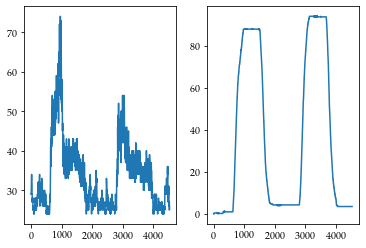

In [8]:
# EMG signals
df = pd.read_excel('DatasetA.xlsx')
print(df)
u = df['EMG'].to_numpy()
u = np.reshape(u,(1,-1))
X = df['Angles'].to_numpy()
X = np.reshape(X,(1,1,-1))
Time = df['Time'].to_numpy()
Time = np.reshape(Time,(1,-1))
_,T = np.shape(Time)
plt.subplot(121)
plt.plot(u[0,:])
plt.subplot(122)
plt.plot(X[0,0,:])
plt.show()
CN=1
U=np.zeros((1,1))

## Single Layer RNN

In [9]:
np.random.seed(2)
stateSize = 1
# RNN Parameters
A = np.array([[0.97]])
P = np.array([[0.05]])

# Initialize vector
xhR1 = np.zeros((stateSize,1,T))
# Neuron number
nn1R1 = 1
nn2R1 = 2
# Weights
W1R1 = np.zeros((stateSize,nn1R1,T))
W1R1[:,:,0:3] = (np.random.random((stateSize,nn1R1,3))*2-1)*0.1#For first traning
c1R1 = np.random.uniform(-1,1,(stateSize,nn1R1))*1

W2R1 = np.zeros((stateSize,nn2R1,T))
W2R1[:,:,0:3] = (np.random.random((stateSize,nn2R1,3))*2-1)*0.1#For first training
c2R1 = np.random.uniform(-1,1,(stateSize,nn2R1))*1

# Identification error
deltaR1 = np.zeros((stateSize,1,T))
#Training
g1R1 = 50
g2R1 = 50



In [10]:
for training in range(CN):
    Loss1=np.zeros(T-1)
    for i in range(2,T-1):
        U[0,0]=u[0,i]
        #Single Layer
        deltaR1[:,:,i] = X[:,:,i]-xhR1[:,:,i]
        Loss1[i] = np.sqrt(np.sum(np.square(deltaR1[:,:,i])))
        W1R1[:,:,i+1] = LAW1(W1R1[:,:,i],deltaR1[:,:,i],g1R1,P,A,functionSigma(xhR1[:,:,i],nn1R1,c1R1),100)
        W2R1[:,:,i+1] = LAW1(W2R1[:,:,i],deltaR1[:,:,i],g2R1,P,A,functionPhi(xhR1[:,:,i],nn2R1,1,c2R1)@U,100)
        xhR1[:,:,i+1] = (A@xhR1[:,:,i] + 0.5*(W1R1[:,:,i+1]+W1R1[:,:,i])@functionSigma(xhR1[:,:,i],nn1R1,c1R1)
                       + 0.5*(W2R1[:,:,i+1]+W2R1[:,:,i])@functionPhi(xhR1[:,:,i],nn2R1,1,c2R1)@U)


print(np.sum(Loss1))

5184.886875075019


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


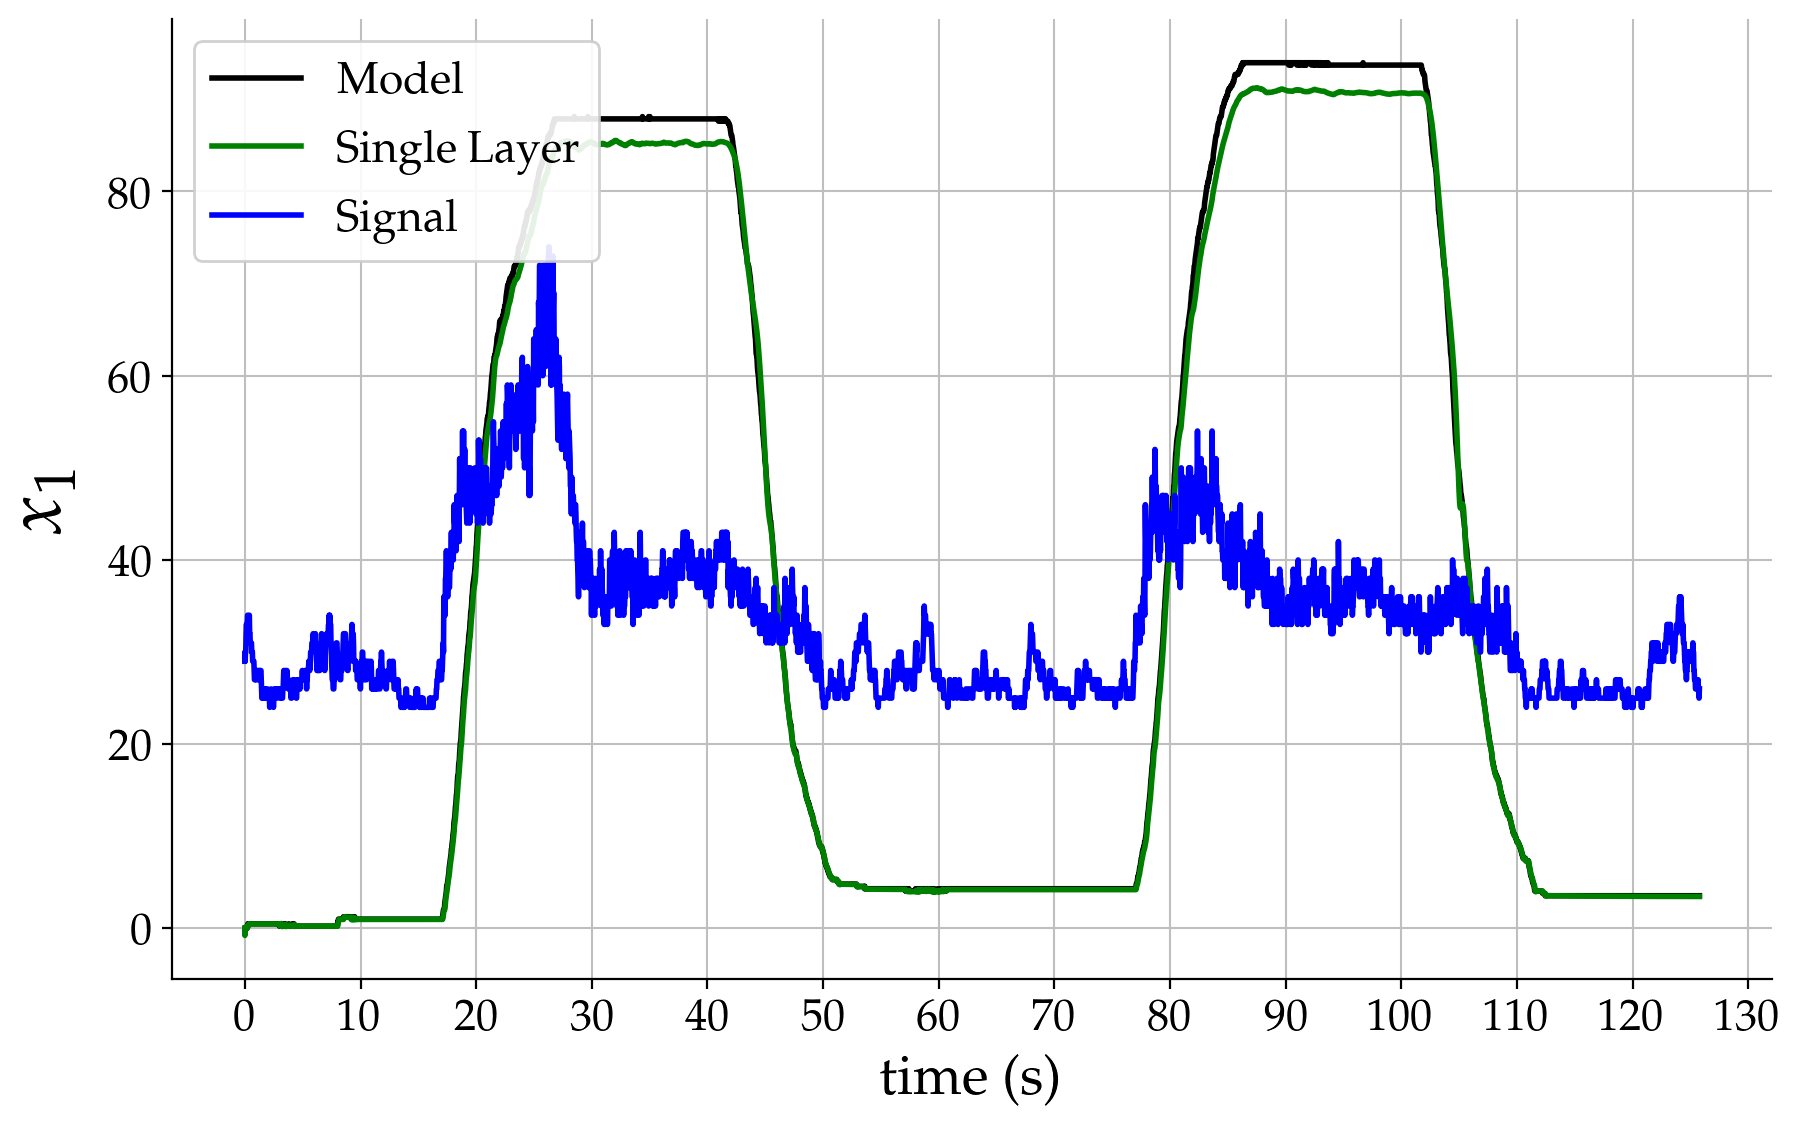

In [11]:
plt.figure(figsize=[10,6],dpi=200)

plt.axes([0.15,0.15,0.8,0.8])
ax = plt.gca()

ax.set_ylabel(r'$x_1$',fontsize=28)
ax.set_xlabel('time (s)',fontsize=20)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

#Different linestyles
plt.plot(Time[0,:-2],X[0,0,2:], 'k',linewidth=2,linestyle='-',label='Model')
plt.plot(Time[0,:-2],xhR1[0,0,2:],'g',linewidth=2,linestyle='-',label='Single Layer')
plt.plot(Time[0,:-2],u[0,2:],'b',linewidth=2,linestyle='-',label='Signal')
#Legend
plt.legend(loc='upper left',frameon=True,fontsize=16,framealpha=0.9)

#Selecte the thicks we are gone to use in the plot
#plt.xticks(np.linspace(0,20,11,endpoint=True))
ax.xaxis.set_major_locator(plt.MultipleLocator(10.0))

ax.grid(which='major', axis='x', linewidth=0.75, linestyle='-', color='0.75')
ax.grid(which='major', axis='y', linewidth=0.75, linestyle='-', color='0.75')
#Change parameters of the axis thicks
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(16)

plt.savefig("EMG_1L_Identifier.png")
plt.show()

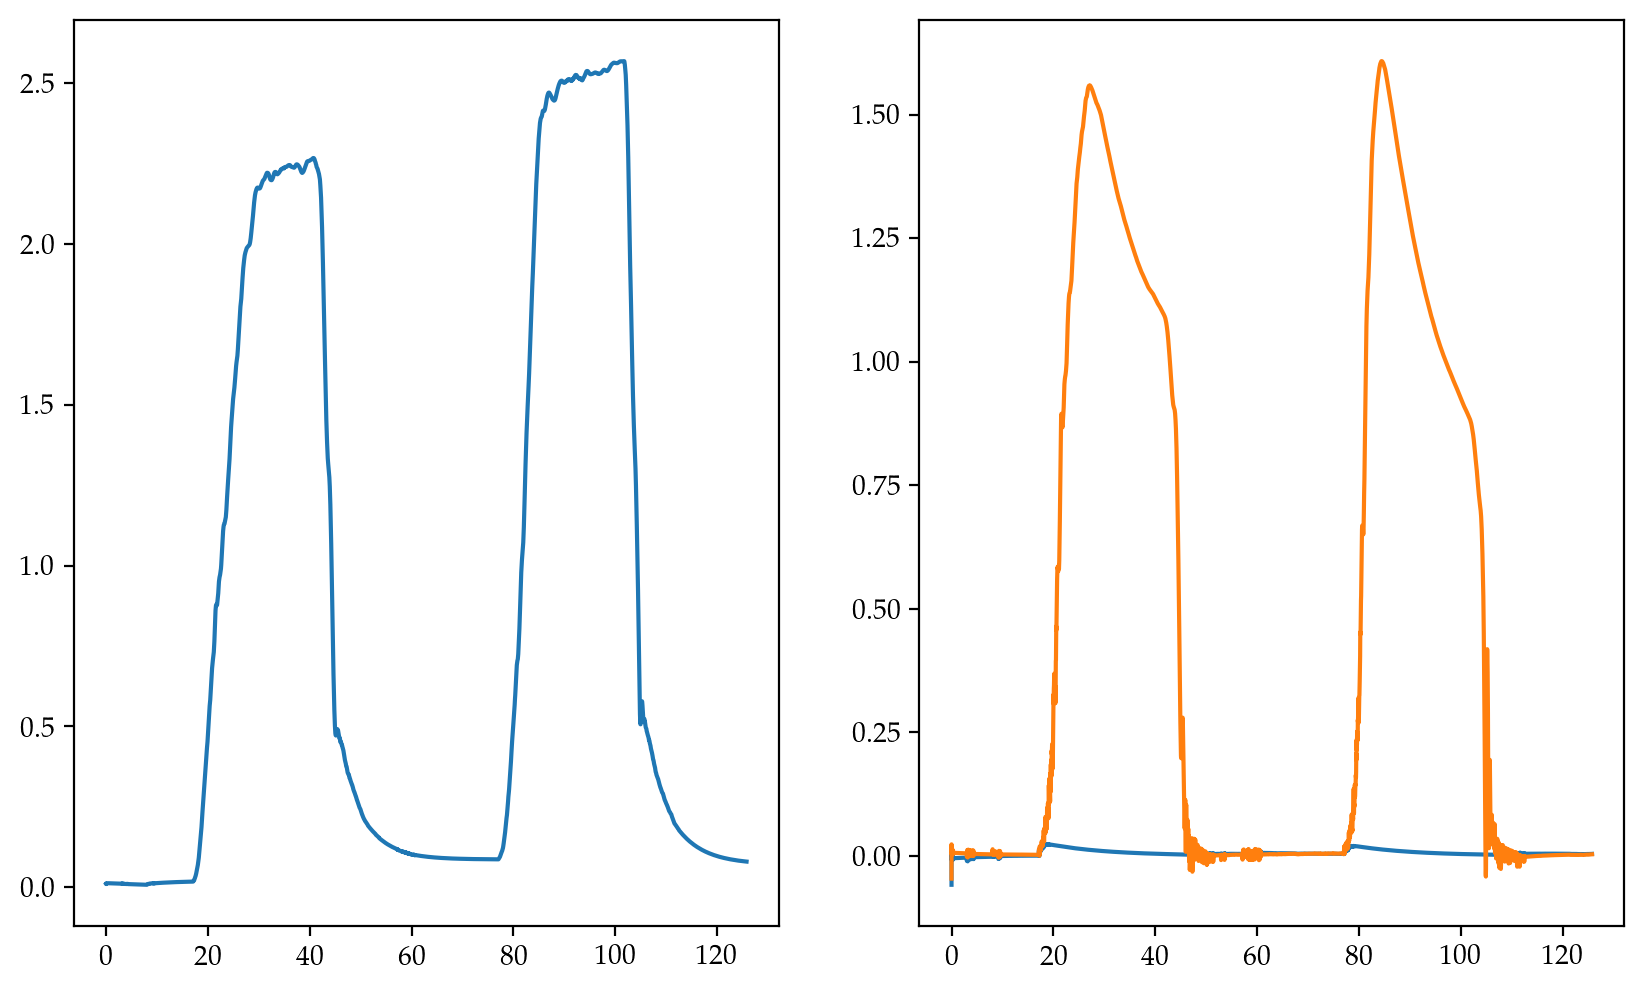

In [12]:
plt.figure(figsize=(10,6),dpi=200)
plt.subplot(121)
plt.plot(Time[0,:-2],W1R1[0,0,2:])
plt.subplot(122)
plt.plot(Time[0,:-2],W2R1[0,0,2:])
plt.plot(Time[0,:-2],W2R1[0,1,2:])
plt.savefig("EMG_1LRNN_Weights.png")
plt.show()

## Two Layer RNN

In [13]:
############################################################################################################
#Two-Layer
####################################
np.random.seed(1)
A2 = np.array([[0.97]])
P2 = np.array([[0.05]])
xhR2 = np.zeros((stateSize,1,T))
nn1R2 = 1
nn2R2 = 2
W1R2 = np.zeros((stateSize,nn1R2,T))
W1R2[:,:,0:3] = (np.random.random((stateSize,nn1R2,3))*2-1)*0.1#For first traning
W2R2= np.zeros((stateSize,nn2R2,T))
W2R2[:,:,0:3] = (np.random.random((stateSize,nn2R2,3))*2-1)*0.1#For first training
#Second layer
nn21R2=2
nn22R2=2
# Coefficient c for the activation function
c21R2 = np.random.uniform(-2,2,(nn21R2,nn1R2))*1
# Lo cambie por la matriz identidad a ver que show
#c21R2 = np.identity(nn1R2)
c22R2 = np.random.uniform(-2,2,(nn22R2,nn2R2))*1
#c22R2 = np.identity(nn2R2)
#Tunning :P
#Weights
W21R2 = np.zeros((nn21R2,stateSize,T))
W21R2[:,:,0:3] = (np.random.random((nn21R2,stateSize,3))*2-1)*0.1#For first traning
W22R2 = np.zeros((nn22R2,stateSize,T))
W22R2[:,:,0:3] = (np.random.random((nn22R2,stateSize,3))*2-1)*0.1#For first training
#Error
deltaR2 = np.zeros((stateSize,1,T))
#Training
g1R2 = 20#20
g2R2 = 20
g12R2 = 50#50
g22R2 = 50

In [14]:
for training in range(CN):
    Loss2=np.zeros(T-1)
    for i in range(2,T-1):
        U[0,0]=u[0,i]
        #Two Layer
        ############################################################################################
        deltaR2[:,:,i] = -xhR2[:,:,i]+X[:,:,i]
        Loss2[i] = np.sqrt(np.sum(np.square(deltaR2[:,:,i])))
        X_W12R2= 0.5*(W21R2[:,:,i]+W21R2[:,:,i-1])@xhR2[:,:,i-1]
        X_W22R2= 0.5*(W22R2[:,:,i]+W22R2[:,:,i-1])@xhR2[:,:,i-1]
        DsigR2 = DSigma(X_W12R2,nn1R2,c21R2)
        DphiR2 = DPhi(X_W22R2,nn2R2,U,c22R2)
        W21R2[:,:,i+1] = LAW2(W21R2[:,:,i],W1R2[:,:,0],deltaR2[:,:,i],g12R2,P2,xhR2[:,:,i],A2,nn21R2,DsigR2)
        W22R2[:,:,i+1] = LAW2(W22R2[:,:,i],W2R2[:,:,0],deltaR2[:,:,i],g22R2,P2,xhR2[:,:,i],A2,nn22R2,DphiR2)
        X_W12R2= 0.5*(W21R2[:,:,i+1]+W21R2[:,:,i])@xhR2[:,:,i]
        X_W22R2= 0.5*(W22R2[:,:,i+1]+W22R2[:,:,i])@xhR2[:,:,i]
        W1R2[:,:,i+1] = LAW1(W1R2[:,:,i],deltaR2[:,:,i],g1R2,P2,A2,functionSigma(X_W12R2,nn1R2,c21R2),100)
        W2R2[:,:,i+1] = LAW1(W2R2[:,:,i],deltaR2[:,:,i],g2R2,P2,A2,functionPhi(X_W22R2,nn2R2,1,c22R2)@U,100)
        xhR2[:,:,i+1] = (A2@xhR2[:,:,i] + 0.5*(W1R2[:,:,i+1]+W1R2[:,:,i])@functionSigma(X_W12R2,nn1R2,c21R2)
                       + 0.5*(W2R2[:,:,i+1]+W2R2[:,:,i])@functionPhi(X_W22R2,nn2R2,1,c22R2)@U)


print(np.sum(Loss2))

2299.092078633726


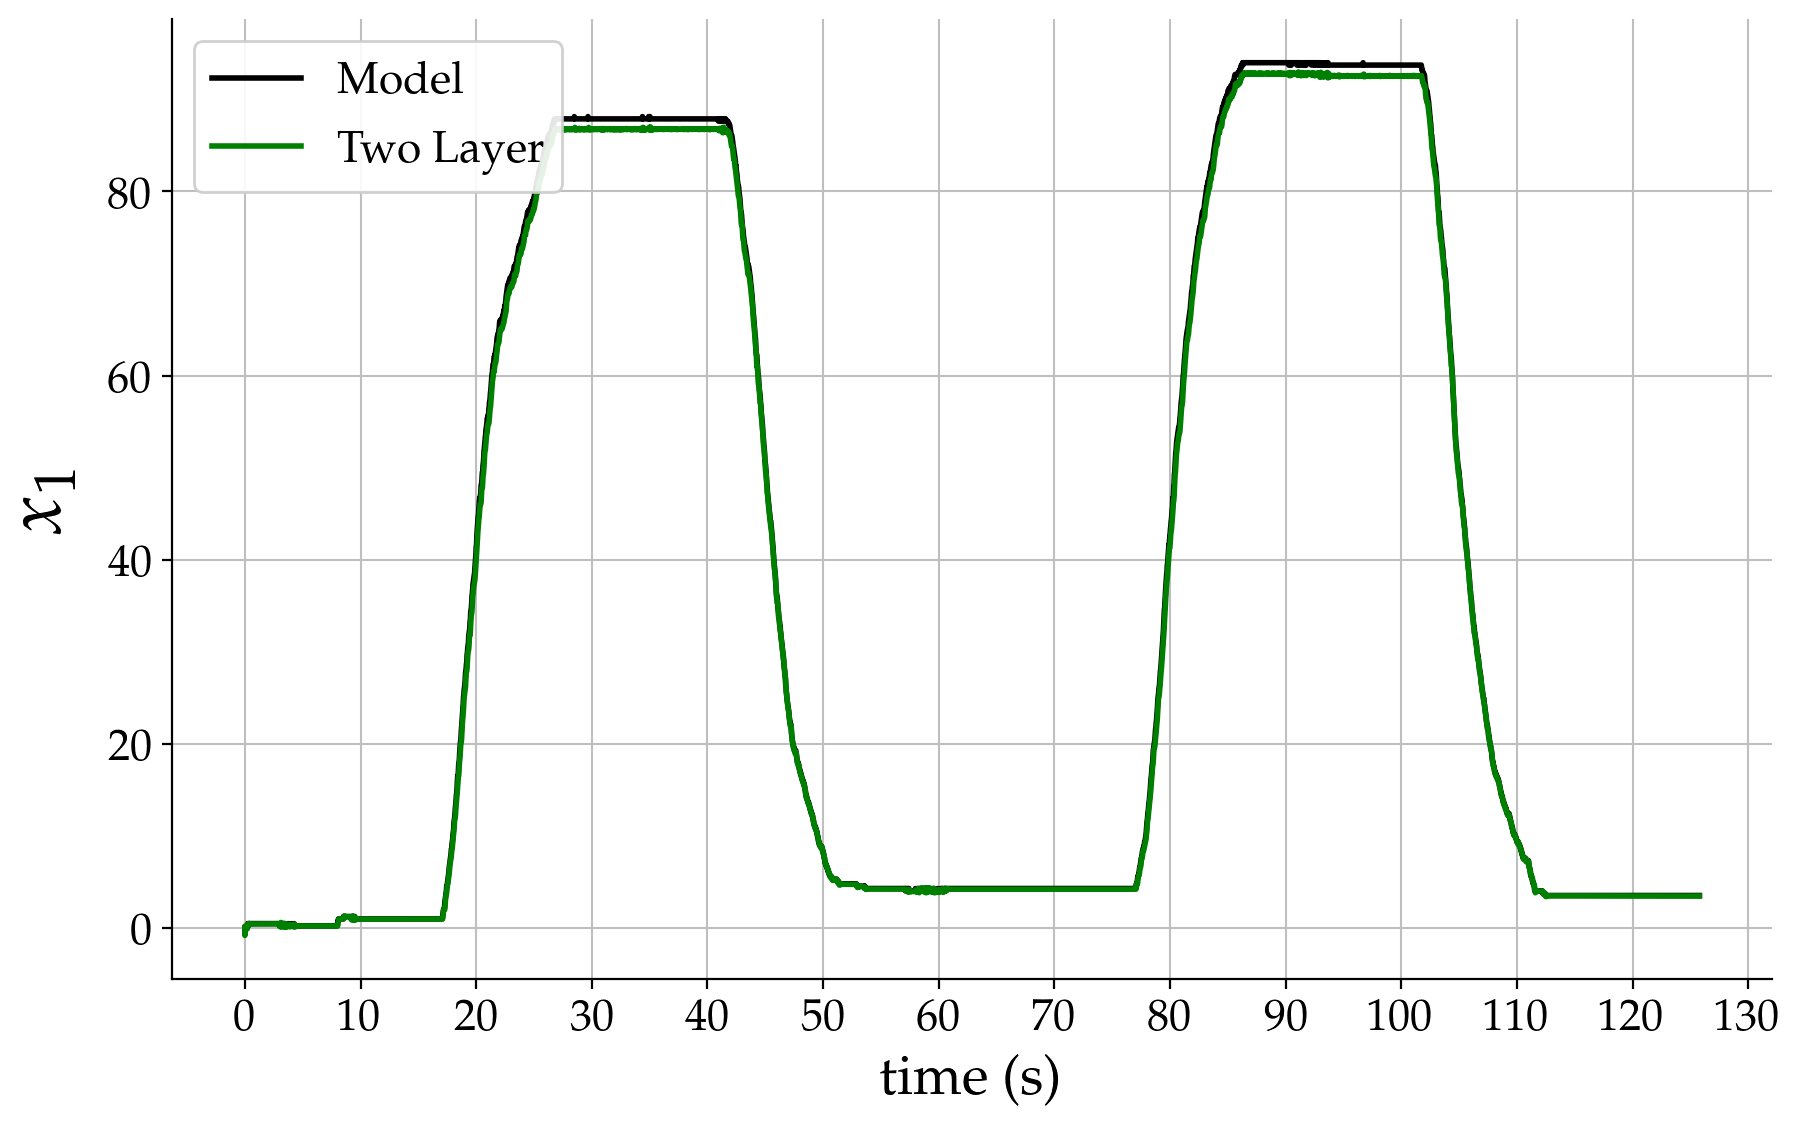

In [15]:
plt.figure(figsize=[10,6],dpi=200)

plt.axes([0.15,0.15,0.8,0.8])
ax = plt.gca()

ax.set_ylabel(r'$x_1$',fontsize=28)
ax.set_xlabel('time (s)',fontsize=20)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

#Different linestyles
plt.plot(Time[0,:-2],X[0,0,2:], 'k',linewidth=2,linestyle='-',label='Model')
plt.plot(Time[0,:-2],xhR2[0,0,2:],'g',linewidth=2,linestyle='-',label='Two Layer')
#plt.plot(Time[0,:-2],u[0,2:],'b',linewidth=2,linestyle='-',label='Input Signal')
#Legend
plt.legend(loc='upper left',frameon=True,fontsize=16,framealpha=0.9)

#Selecte the thicks we are gone to use in the plot
#plt.xticks(np.linspace(0,20,11,endpoint=True))
ax.xaxis.set_major_locator(plt.MultipleLocator(10.0))

ax.grid(which='major', axis='x', linewidth=0.75, linestyle='-', color='0.75')
ax.grid(which='major', axis='y', linewidth=0.75, linestyle='-', color='0.75')
#Change parameters of the axis thicks
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(16)

plt.savefig("EMG_2L_Identifier.png")
plt.show()

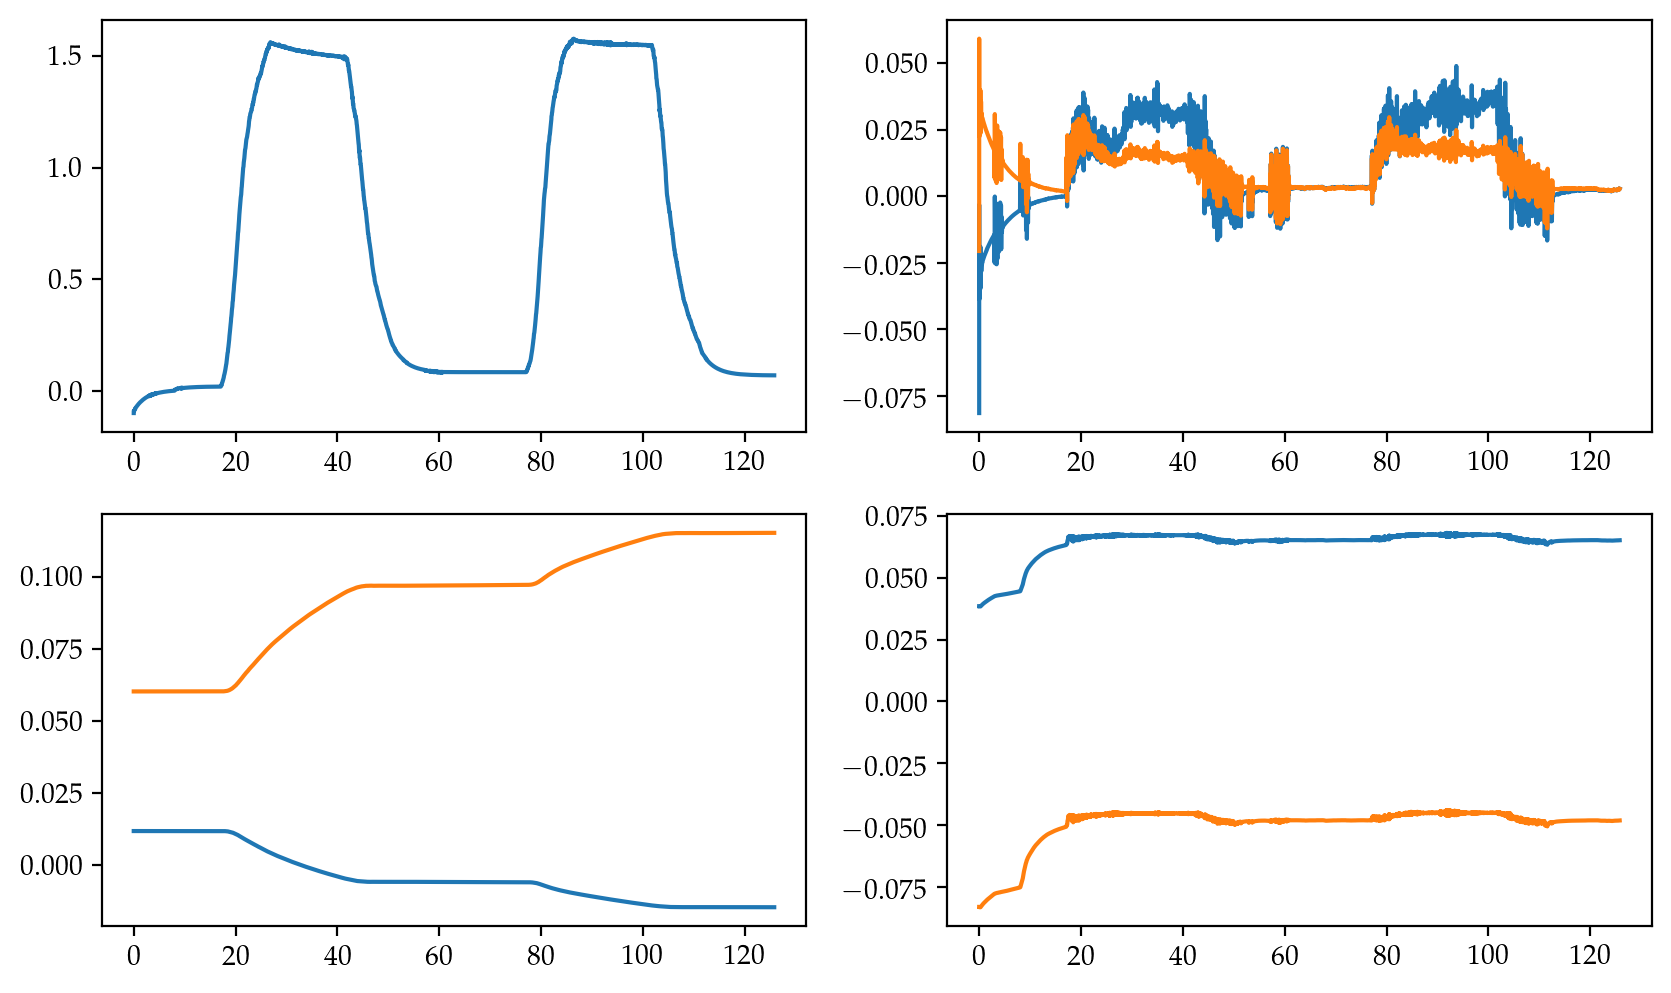

In [16]:
plt.figure(figsize=(10,6),dpi=200)
plt.subplot(221)
plt.plot(Time[0,:-2],W1R2[0,0,2:])
plt.subplot(222)
plt.plot(Time[0,:-2],W2R2[0,0,2:])
plt.plot(Time[0,:-2],W2R2[0,1,2:])
plt.subplot(223)
plt.plot(Time[0,:-2],W21R2[0,0,2:])
plt.plot(Time[0,:-2],W21R2[1,0,2:])
plt.subplot(224)
plt.plot(Time[0,:-2],W22R2[0,0,2:])
plt.plot(Time[0,:-2],W22R2[1,0,2:])
plt.savefig("EMG_2LRNN_Weights.png")
plt.show()

## THREE LAYER

In [17]:
np.random.seed(2)
stateSize = 1
############################################################################################################
#Three-Layer
####################################
A3 = np.array([[0.97]])
P3 = np.array([[0.05]])


xhR3 = np.zeros((stateSize,1,T))
#Weight size
nn1R3 = 1
nn2R3 = 1

nn21R3a= 2
nn22R3a= 2

nn21R3b= 3
nn22R3b= 3

nn31R3= 4
nn32R3= 4

#Weights
W1R3 = np.zeros((stateSize,nn1R3,T))
W1R3[:,:,0:3] = (np.random.random((stateSize,nn1R3,3))*2-1)*0.1#For first traning
W2R3 = np.zeros((stateSize,nn2R3,T))
W2R3[:,:,0:3] = (np.random.random((stateSize,nn2R3,3))*2-1)*0.1#For first training

W21R3 = np.zeros((nn21R3a,nn21R3b,T))
W21R3[:,:,0:3] = (np.random.random((nn21R3a,nn21R3b,3))*2-1)*0.1#For first traning
W22R3 = np.zeros((nn22R3a,nn22R3b,T))
W22R3[:,:,0:3] = (np.random.random((nn22R3a,nn22R3b,3))*2-1)*0.1#For first training

W31R3 = np.zeros((nn31R3,stateSize,T))
W31R3[:,:,0:3] = (np.random.random((nn31R3,stateSize,3))*2-1)*0.1#For first traning
W32R3 = np.zeros((nn32R3,stateSize,T))
W32R3[:,:,0:3] = (np.random.random((nn32R3,stateSize,3))*2-1)*0.1#For first training

#Activation functions
#Proving identity functions
c1R3 = np.random.uniform(-1,1,(nn21R3a,nn1R3))
#c1R3 = np.identity(nn1R3)
c2R3 = np.random.uniform(-1,1,(nn22R3a,nn2R3))
#c2R3 = np.identity(nn2R3)
c21R3 = np.random.uniform(-1,1,(nn31R3,nn21R3b))
#c21R3 = np.identity(nn31R3)
c22R3 = np.random.uniform(-1,1,(nn32R3,nn22R3b))
#c22R3 = np.identity(nn32R3)
#Error
deltaR3 = np.zeros((stateSize,1,T))
#Training
g1R3 = 7
g2R3 = 7

g12R3 = 100
g22R3 = 100

g13R3 = 100
g23R3 = 100

########################################################################
########################################################################
########################################################################
U=np.zeros((1,1))

In [18]:
for training in range(CN):
    Loss3=np.zeros(T-1)
    for i in range(2,T-1):
        U[0,0]=u[0,i]
        #Three layer
        ############################################################################################
        deltaR3[:,:,i] = +X[:,:,i]-xhR3[:,:,i]
        Loss3[i] = np.sqrt(np.sum(np.square(deltaR3[:,:,i])))
        X_W13R3= 0.5*(W31R3[:,:,i]+W31R3[:,:,i-1])@xhR3[:,:,i-1]
        X_W23R3= 0.5*(W32R3[:,:,i]+W32R3[:,:,i-1])@xhR3[:,:,i-1]
        Dsig2R3 = DSigma(X_W13R3,nn21R3b,c21R3)
        Dphi2R3 = DSigma(X_W23R3,nn22R3b,c22R3)
        X_W12R3= 0.5*(W21R3[:,:,i]+W21R3[:,:,i-1])@functionSigma(X_W13R3,nn21R3b,c21R3) 
        X_W22R3= 0.5*(W22R3[:,:,i]+W22R3[:,:,i-1])@functionSigma(X_W23R3,nn22R3b,c22R3)
        Dsig1R3 = DSigma(X_W12R3,nn1R3,c1R3)
        Dphi1R3 = DPhi(X_W22R3,nn2R3,U,c2R3)
        W31R3[:,:,i+1] = LAW3(W31R3[:,:,i],W1R3[:,:,0],W21R3[:,:,0],
                              deltaR3[:,:,i],g13R3,P3,xhR3[:,:,i],A3,nn31R3,Dsig1R3,Dsig2R3)
        W32R3[:,:,i+1] = LAW3(W32R3[:,:,i],W2R3[:,:,0],W22R3[:,:,0],
                              deltaR3[:,:,i],g23R3,P3,xhR3[:,:,i],A3,nn32R3,Dphi1R3,Dphi2R3)
        X_W13R3= 0.5*(W31R3[:,:,i+1]+W31R3[:,:,i])@xhR3[:,:,i]
        X_W23R3= 0.5*(W32R3[:,:,i+1]+W32R3[:,:,i])@xhR3[:,:,i]
        W21R3[:,:,i+1] = LAW2(W21R3[:,:,i],W1R3[:,:,0],deltaR3[:,:,i],g12R3,P3,
                               functionSigma(X_W13R3,nn21R3b,c21R3),A3,nn21R3a,Dsig1R3)
        W22R3[:,:,i+1] = LAW2(W22R3[:,:,i],W2R3[:,:,0],deltaR3[:,:,i],g22R3,P3,
                               functionSigma(X_W23R3,nn22R3b,c22R3),A3,nn22R3a,Dphi1R3)
        X_W12R3= 0.5*(W21R3[:,:,i+1]+W21R3[:,:,i])@functionSigma(X_W13R3,nn21R3b,c21R3)
        X_W22R3= 0.5*(W22R3[:,:,i+1]+W22R3[:,:,i])@functionSigma(X_W23R3,nn22R3b,c22R3)
        W1R3[:,:,i+1] = LAW1(W1R3[:,:,i],deltaR3[:,:,i],g1R3,P3,A3,functionSigma(X_W12R3,nn1R3,c1R3),100)
        W2R3[:,:,i+1] = LAW1(W2R3[:,:,i],deltaR3[:,:,i],g2R3,P3,A3,functionPhi(X_W22R3,nn2R3,1,c2R3)@U,100)
        xhR3[:,:,i+1] = (A3@xhR3[:,:,i] + 0.5*(W1R3[:,:,i+1]+W1R3[:,:,i])@functionSigma(X_W12R3,nn1R3,c1R3)
                       + 0.5*(W2R3[:,:,i+1]+W2R3[:,:,i])@functionPhi(X_W22R3,nn2R3,1,c2R3)@U)

        


print(np.sum(Loss3))

2133.417953229943


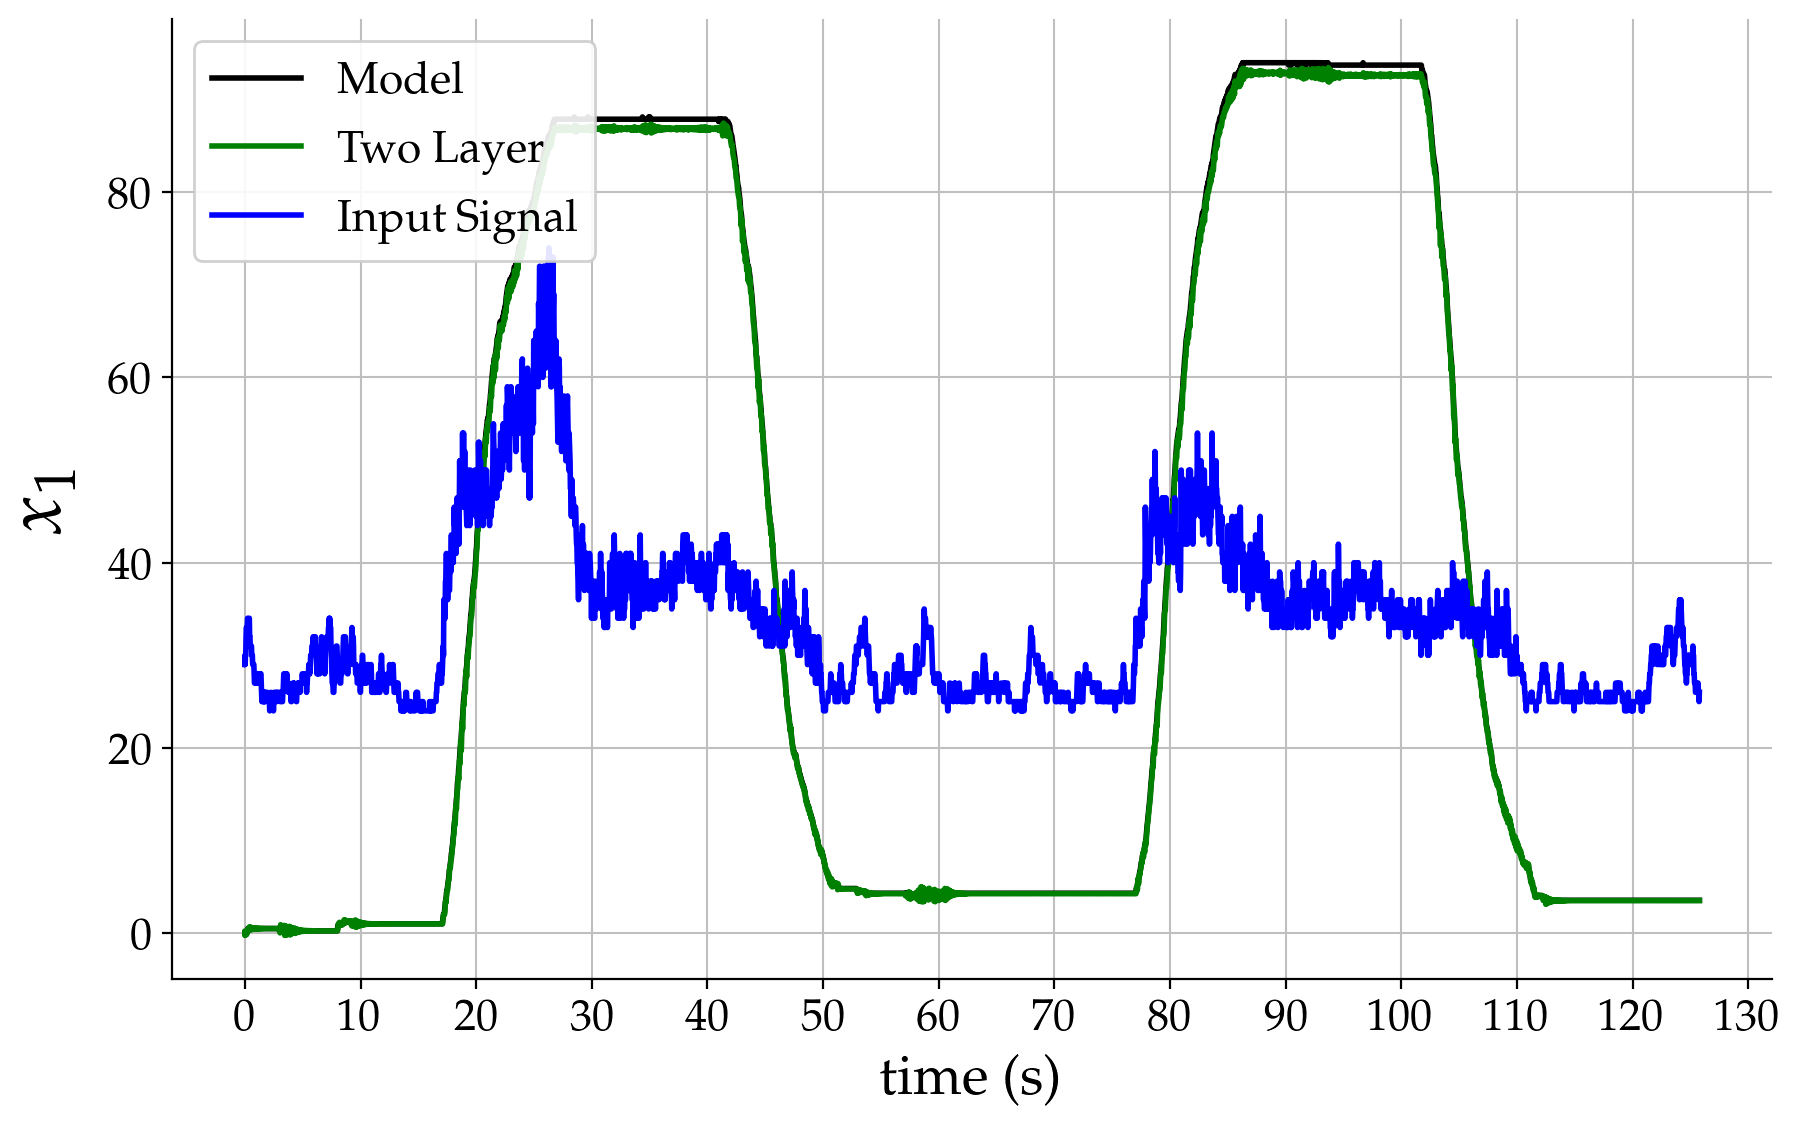

In [19]:
plt.figure(figsize=[10,6],dpi=200)

plt.axes([0.15,0.15,0.8,0.8])
ax = plt.gca()

ax.set_ylabel(r'$x_1$',fontsize=28)
ax.set_xlabel('time (s)',fontsize=20)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

#Different linestyles
plt.plot(Time[0,:-2],X[0,0,2:], 'k',linewidth=2,linestyle='-',label='Model')
plt.plot(Time[0,:-2],xhR3[0,0,2:],'g',linewidth=2,linestyle='-',label='Two Layer')
plt.plot(Time[0,:-2],u[0,2:],'b',linewidth=2,linestyle='-',label='Input Signal')

#Legend
plt.legend(loc='upper left',frameon=True,fontsize=16,framealpha=0.9)

#Selecte the thicks we are gone to use in the plot
#plt.xticks(np.linspace(0,20,11,endpoint=True))
ax.xaxis.set_major_locator(plt.MultipleLocator(10.0))

ax.grid(which='major', axis='x', linewidth=0.75, linestyle='-', color='0.75')
ax.grid(which='major', axis='y', linewidth=0.75, linestyle='-', color='0.75')
#Change parameters of the axis thicks
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(16)

#plt.xlim(0,20)
#plt.ylim(-2,7)
######################################################################################
######################################################################################
#plt.axes([0.5,0.6,0.3,0.3])
#ax2 = plt.gca()
#plt.plot(Time[0,:-2],X[0,0,2:], 'k',linewidth=9,linestyle='-',label='Model')
#plt.plot(Time[0,:-2],xhR2[0,0,2:],'g',linewidth=5,linestyle='--',label='Two Layer')
#plt.plot(time[:-1],xhR3[0,0,2:],'b',linewidth=5,linestyle='-.',label='Three Layer')

#ax2.grid(which='major',axis='x',linewidth=0.25,linestyle='-',color='0.75')
#ax2.grid(which='major',axis='y',linewidth=0.25,linestyle='-',color='0.75')

#plt.xlim(0, 1);
#plt.ylim(-0.5,0.7)
#plt.xticks(np.linspace(0,0.5,6,endpoint=True))

#for label in ax2.get_xticklabels() + ax2.get_yticklabels():
#    label.set_fontsize(16)
    #label.set_bbox(dict(facecolor='white', edgecolor='None', alpha=0.65 ))

plt.savefig("EMG.png")
plt.show()

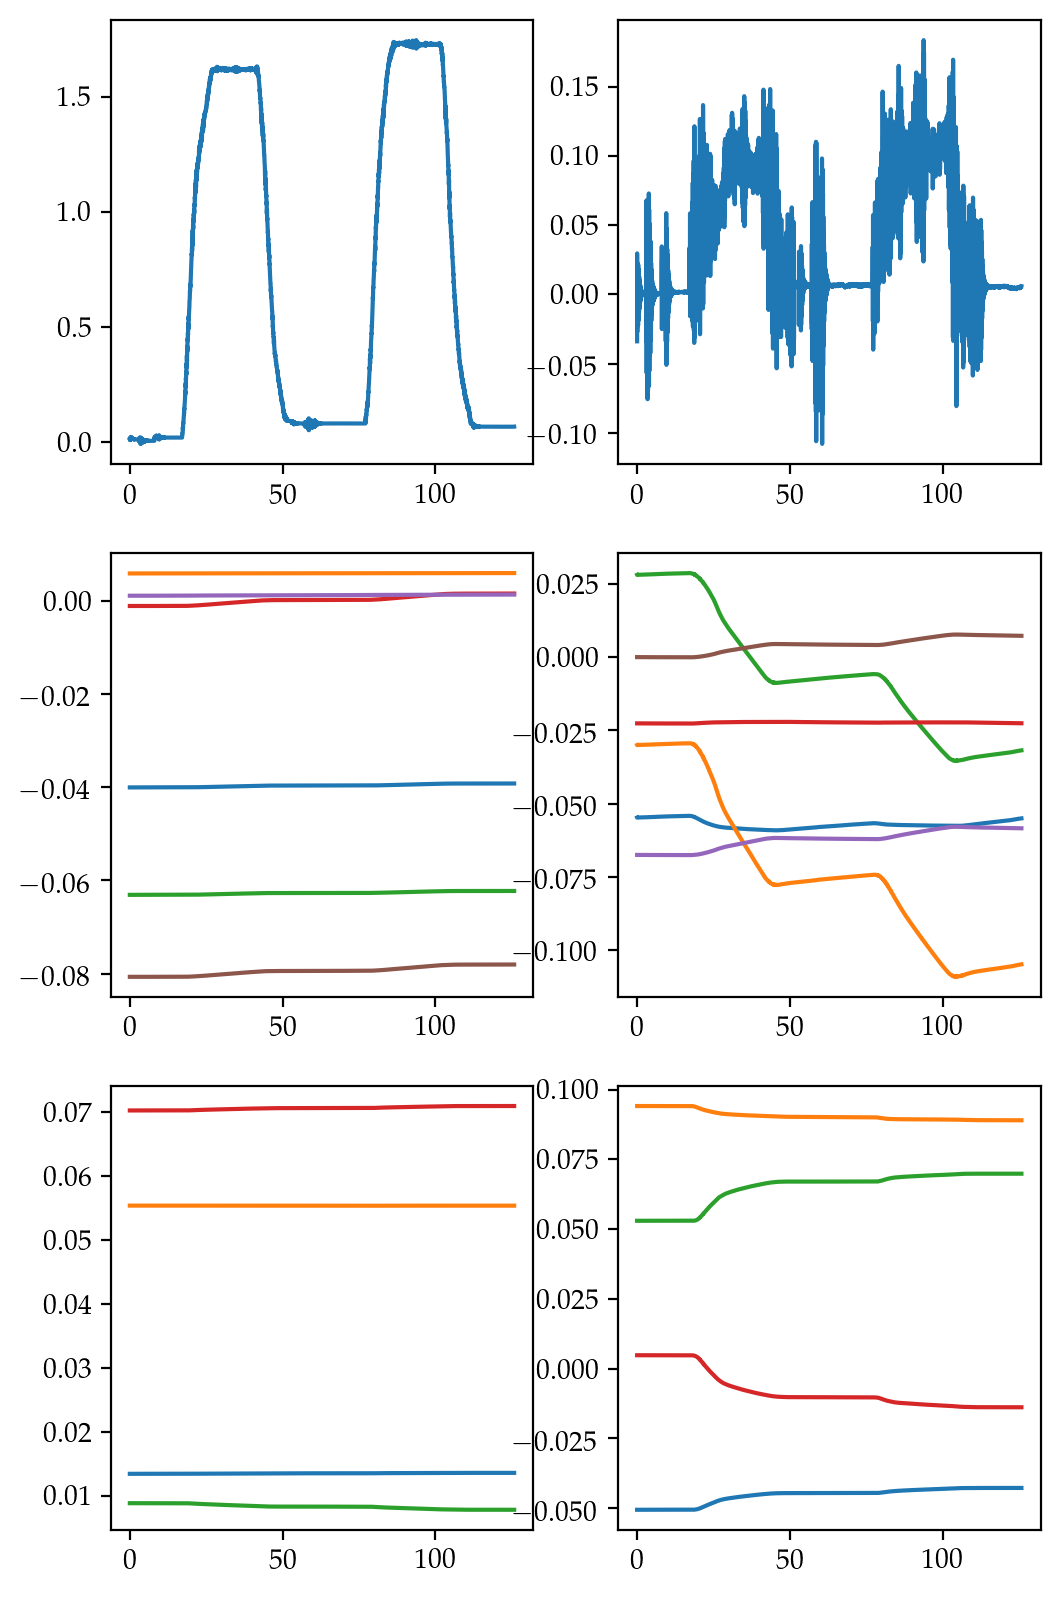

In [20]:
plt.figure(figsize=(6,10),dpi=200)
plt.subplot(321)
plt.plot(Time[0,:-2],W1R3[0,0,2:])
plt.subplot(322)
plt.plot(Time[0,:-2],W2R3[0,0,2:])
plt.subplot(323)
plt.plot(Time[0,:-2],W21R3[0,0,2:])
plt.plot(Time[0,:-2],W21R3[0,1,2:])
plt.plot(Time[0,:-2],W21R3[0,2,2:])
plt.plot(Time[0,:-2],W21R3[1,0,2:])
plt.plot(Time[0,:-2],W21R3[1,1,2:])
plt.plot(Time[0,:-2],W21R3[1,2,2:])
plt.subplot(324)
plt.plot(Time[0,:-2],W22R3[0,0,2:])
plt.plot(Time[0,:-2],W22R3[0,1,2:])
plt.plot(Time[0,:-2],W22R3[0,2,2:])
plt.plot(Time[0,:-2],W22R3[1,0,2:])
plt.plot(Time[0,:-2],W22R3[1,1,2:])
plt.plot(Time[0,:-2],W22R3[1,2,2:])
plt.subplot(325)
plt.plot(Time[0,:-2],W31R3[0,0,2:])
plt.plot(Time[0,:-2],W31R3[1,0,2:])
plt.plot(Time[0,:-2],W31R3[2,0,2:])
plt.plot(Time[0,:-2],W31R3[3,0,2:])
plt.subplot(326)
plt.plot(Time[0,:-2],W32R3[0,0,2:])
plt.plot(Time[0,:-2],W32R3[1,0,2:])
plt.plot(Time[0,:-2],W32R3[2,0,2:])
plt.plot(Time[0,:-2],W32R3[3,0,2:])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


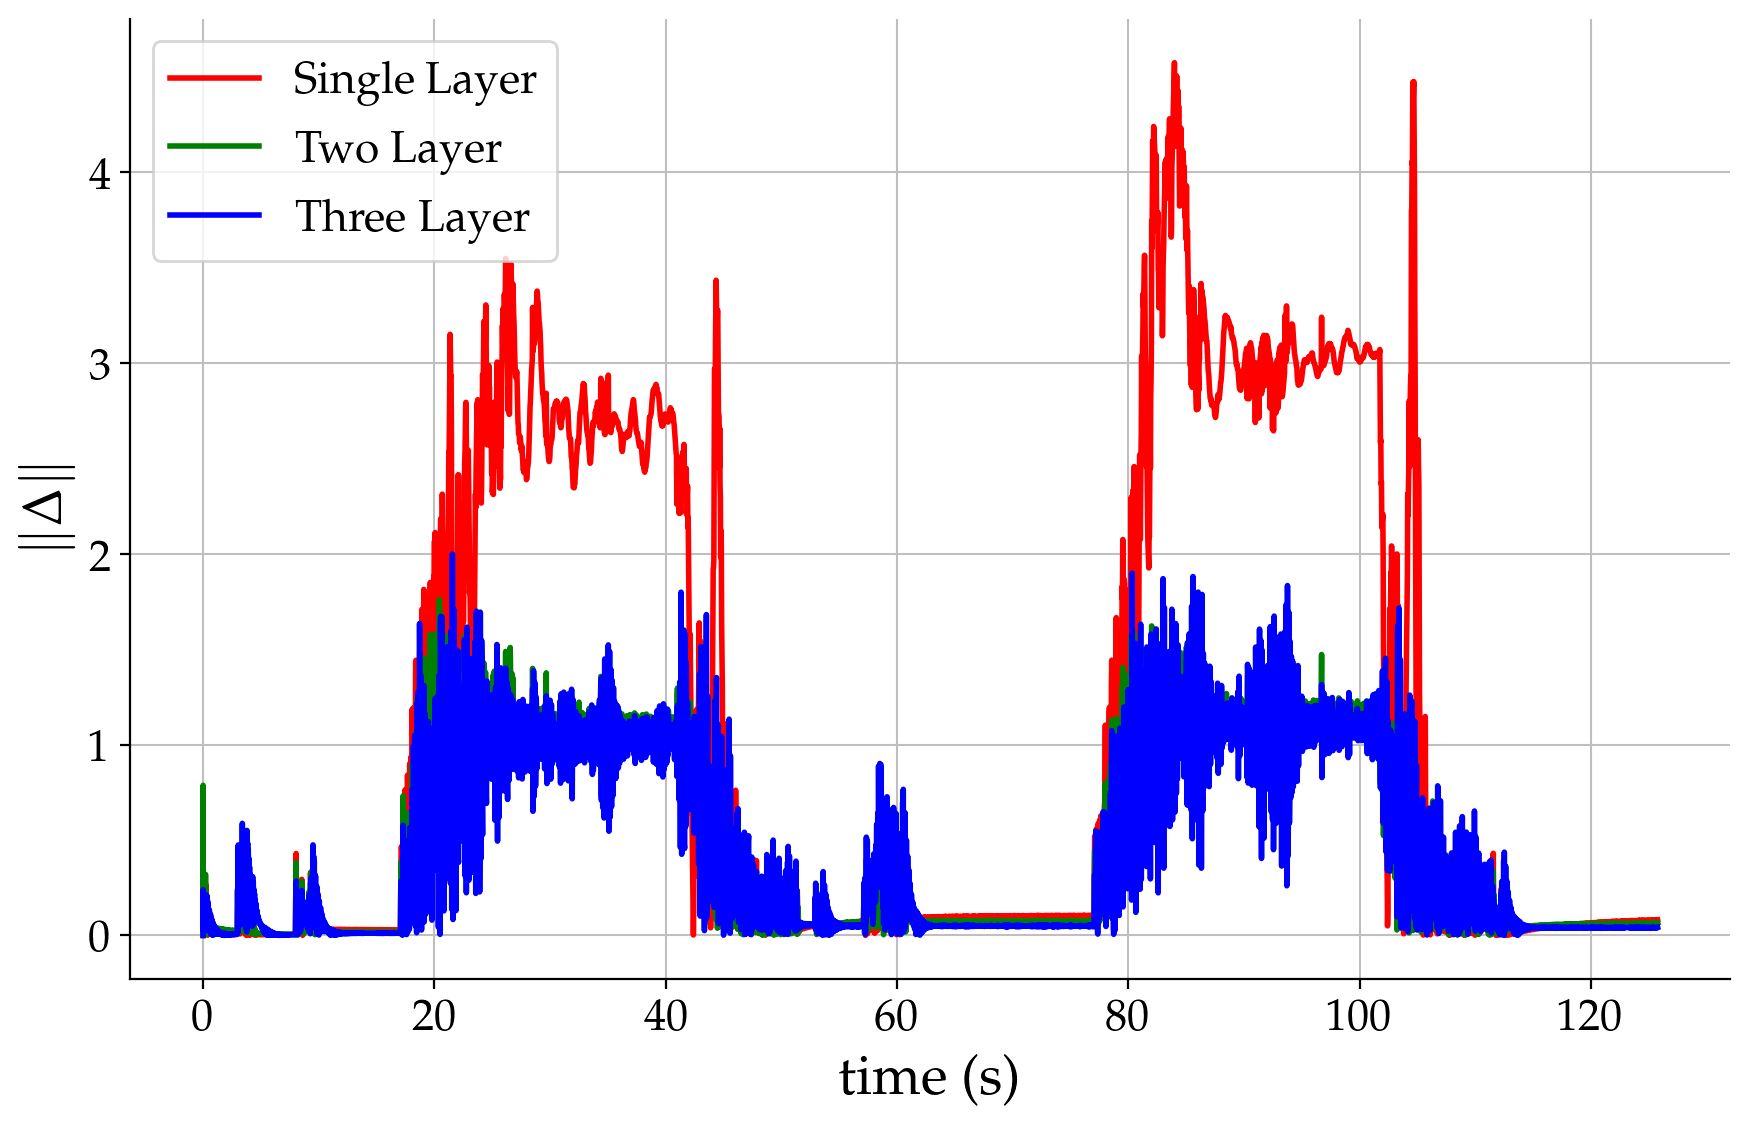

In [23]:
plt.figure(figsize=(10,6), dpi=200)
#Set the position of the axes
plt.axes([0.15,0.15,.8,.8])

ax = plt.gca()
#Title
ax.set_ylabel('$\Vert\Delta\Vert$',fontsize=20)
ax.set_xlabel('time (s)',fontsize=20)
#Make invisible some axes in order to appreciate better the subplot
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

#Different linestyles
plt.plot(Time[0,:-3],Loss1[2:],'red',linewidth=2,linestyle='-',label='Single Layer');
plt.plot(Time[0,:-3],Loss2[2:],'green',linewidth=2,linestyle='-',label='Two Layer');
plt.plot(Time[0,:-3],Loss3[2:],'blue',linewidth=2,linestyle='-',label='Three Layer');
#Legend
plt.legend(loc='upper left',frameon=True,fontsize=16)

#plt.ylim(0, 2);
#plt.xlim(0, 30);
#Selecte the thicks we are gone to use in the plot
#plt.xticks(np.linspace(0,30,11,endpoint=True))
#ax.xaxis.set_major_locator(plt.MultipleLocator(2.0))
#ax.xaxis.set_minor_locator(plt.MultipleLocator(0.1))

ax.grid(which='major', axis='x', linewidth=0.75, linestyle='-', color='0.75')
#ax.grid(which='minor', axis='x', linewidth=0.25, linestyle='-', color='0.75')


ax.grid(which='major', axis='y', linewidth=0.75, linestyle='-', color='0.75')
#ax.grid(which='minor', axis='y', linewidth=0.25, linestyle='-', color='0.75')
#Change parameters of the axis thicks
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(16)


#plt.axes([0.45,0.5,0.4,0.4])
#ax2 = plt.gca()
#ax2.grid(which='major',axis='x',linewidth=0.25,linestyle='-',color='0.75')
#ax2.grid(which='major',axis='y',linewidth=0.25,linestyle='-',color='0.75')
#plt.plot(Time[0,:-3],Loss2[2:],'green',linewidth=7,linestyle='-',label='Two Layer');
#plt.plot(Time[0,:-3],Loss3[2:],'blue',linewidth=7,linestyle='-',label='Three Layer');
#plt.ylim(0, 1.5);
#plt.xlim(3, 5);
#plt.xticks(np.linspace(3,5,6,endpoint=True))
#plt.yticks(np.linspace(0,0.2,3,endpoint=True))
#for label in ax2.get_xticklabels() + ax2.get_yticklabels():
#    label.set_fontsize(16)
#Set the label


plt.savefig("ErrorDifferenceEMGV2.eps",dpi=200)
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


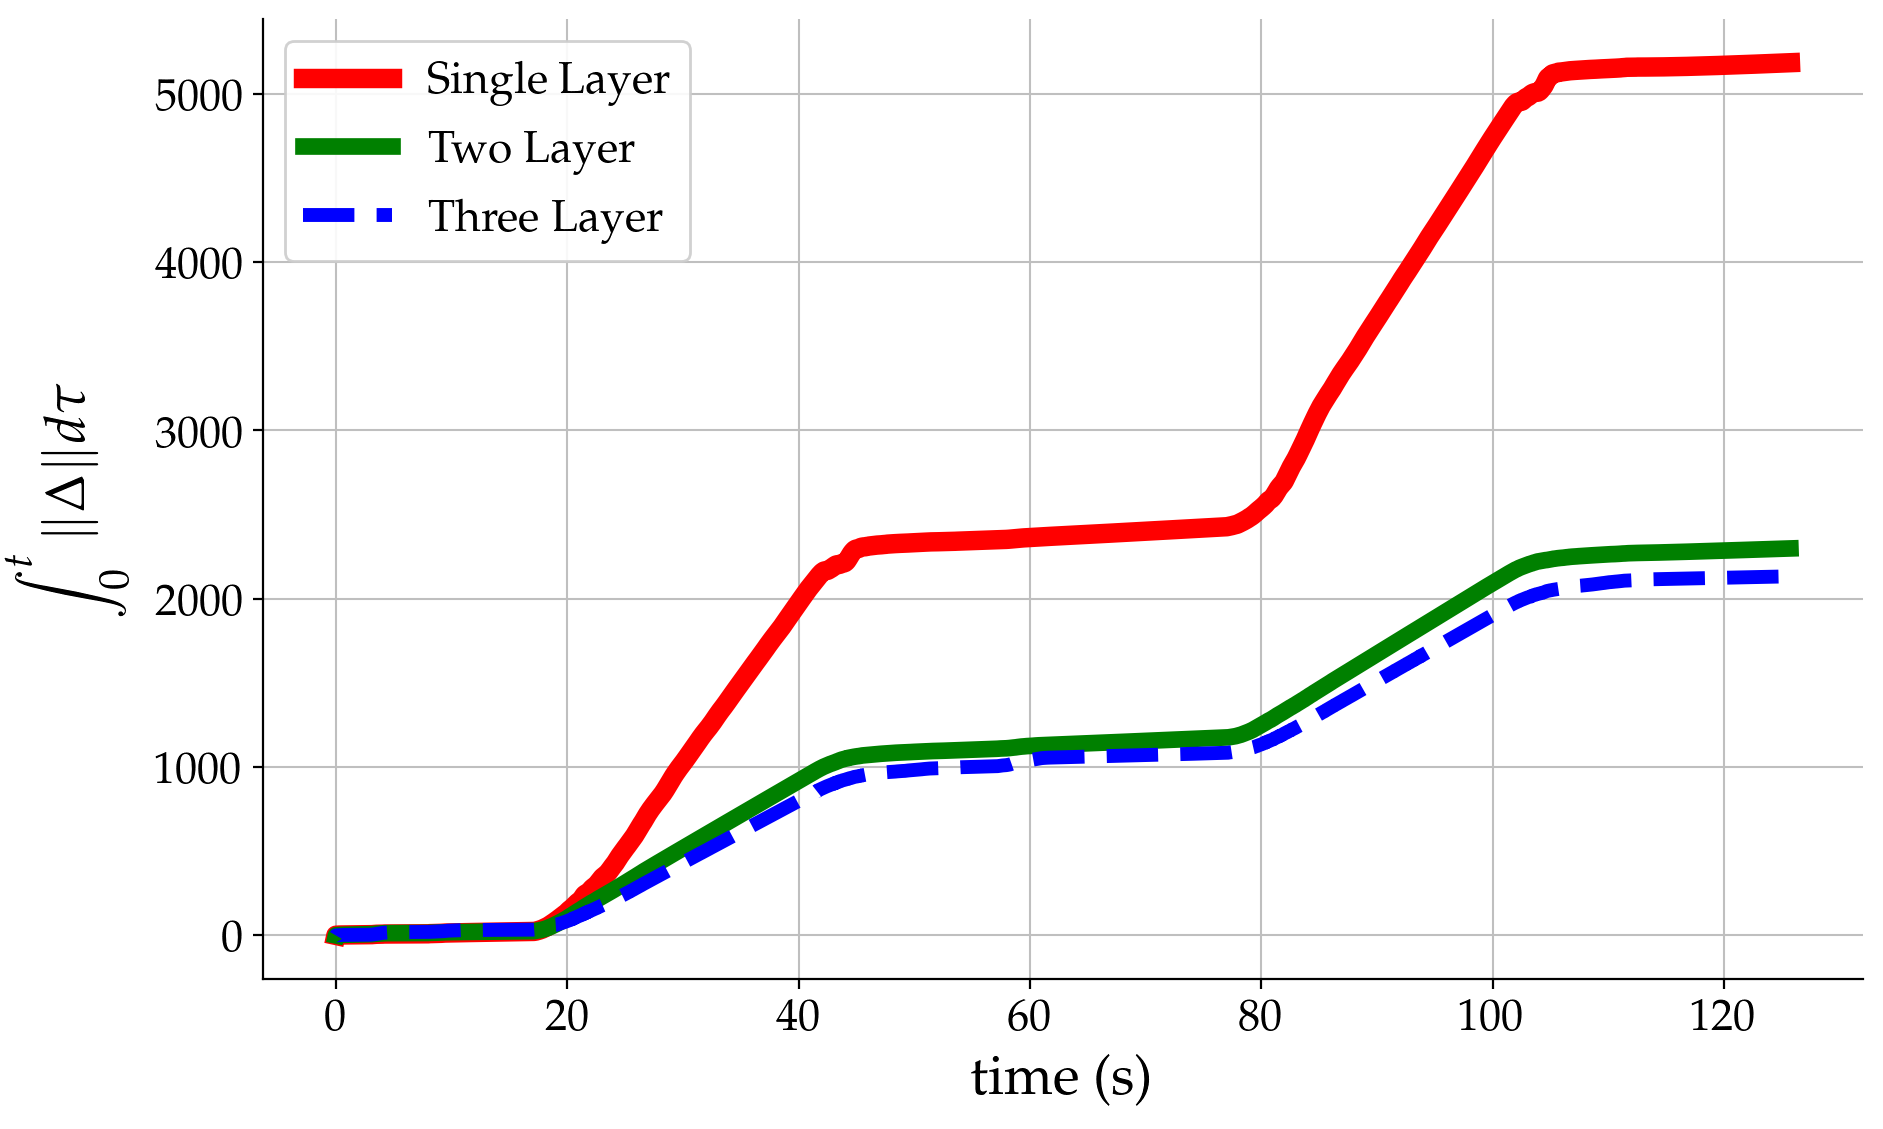

In [32]:
AccumLoss1=np.cumsum(Loss1)
AccumLoss2=np.cumsum(Loss2)
AccumLoss3=np.cumsum(Loss3)
#Using a 8 per 6 points figure with 100 points per inch
plt.figure(figsize=(10,6), dpi=200)

#Set the position of the axes
plt.axes([0.15,0.1,0.8,0.8])

ax = plt.gca()
#Title
ax.set_ylabel(r'$\displaystyle\int_0^{t}\Vert \Delta \Vert d\tau$',fontsize=20)
ax.set_xlabel('time (s)',fontsize=20)
#Make invisible some axes in order to appreciate better the subplot
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

#Different linestyles
plt.plot(Time[0,:-3],AccumLoss1[2:],'red',linewidth=7,linestyle='-',label='Single Layer');
plt.plot(Time[0,:-3],AccumLoss2[2:],'g',linewidth=6,linestyle='-',label='Two Layer');
plt.plot(Time[0,:-3],AccumLoss3[2:],'b',linewidth=5,linestyle='--',label='Three Layer');

#plt.fill_between(time, AccumLoss1,color='red')
#plt.fill_between(time, AccumLoss2,color='yellow')
#plt.fill_between(time, AccumLoss3,color='blue')
#Legend
plt.legend(loc='upper left',frameon=True,fontsize=16,framealpha=0.9)

#plt.ylim(0, 120);
#plt.xlim(0, 30);
#Selecte the thicks we are gone to use in the plot
#plt.xticks(np.linspace(0,10,11,endpoint=True))
#ax.xaxis.set_major_locator(plt.MultipleLocator(2.0))
#ax.xaxis.set_minor_locator(plt.MultipleLocator(0.1))

ax.grid(which='major', axis='x', linewidth=0.75, linestyle='-', color='0.75')
#ax.grid(which='minor', axis='x', linewidth=0.25, linestyle='-', color='0.75')


ax.grid(which='major', axis='y', linewidth=0.75, linestyle='-', color='0.75')
#ax.grid(which='minor', axis='y', linewidth=0.25, linestyle='-', color='0.75')
#Change parameters of the axis thicks
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(16)
##############################################################################################
#plt.axes([0.25,0.6,0.25,0.3])

#ax2 = plt.gca()
#ax2.grid(which='major',axis='x',linewidth=0.25,linestyle='-',color='0.75')
#ax2.grid(which='major',axis='y',linewidth=0.25,linestyle='-',color='0.75')

#plt.plot(time,AccumLoss1,'red',linewidth=7,linestyle='-',label='Single Layer');
#plt.plot(time,AccumLoss2,'g',linewidth=6,linestyle='-',label='Two Layer');
#plt.plot(time,AccumLoss3,'b',linewidth=5,linestyle='--',label='Three Layer');

#plt.fill_between(time, AccumLoss1,color='red')
#plt.fill_between(time, AccumLoss2,color='yellow')
#plt.fill_between(time, AccumLoss3,color='blue')

#plt.ylim(105, 112);
#plt.xlim(28, 30);
#plt.xticks(np.linspace(19.9,19.99,3,endpoint=True))
#plt.yticks(np.linspace(65,69,4,endpoint=True))
#for label in ax2.get_xticklabels() + ax2.get_yticklabels():
#    label.set_fontsize(16)
#    label.set_bbox(dict(facecolor='white', edgecolor='None', alpha=0.65 ))


#ax2.grid(which='major', axis='x', linewidth=0.75, linestyle='-', color='0.75')
#ax2.grid(which='major', axis='y', linewidth=0.75, linestyle='-', color='0.75')


plt.savefig("AccumulativeErrorEMGV2.eps",dpi=200)
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


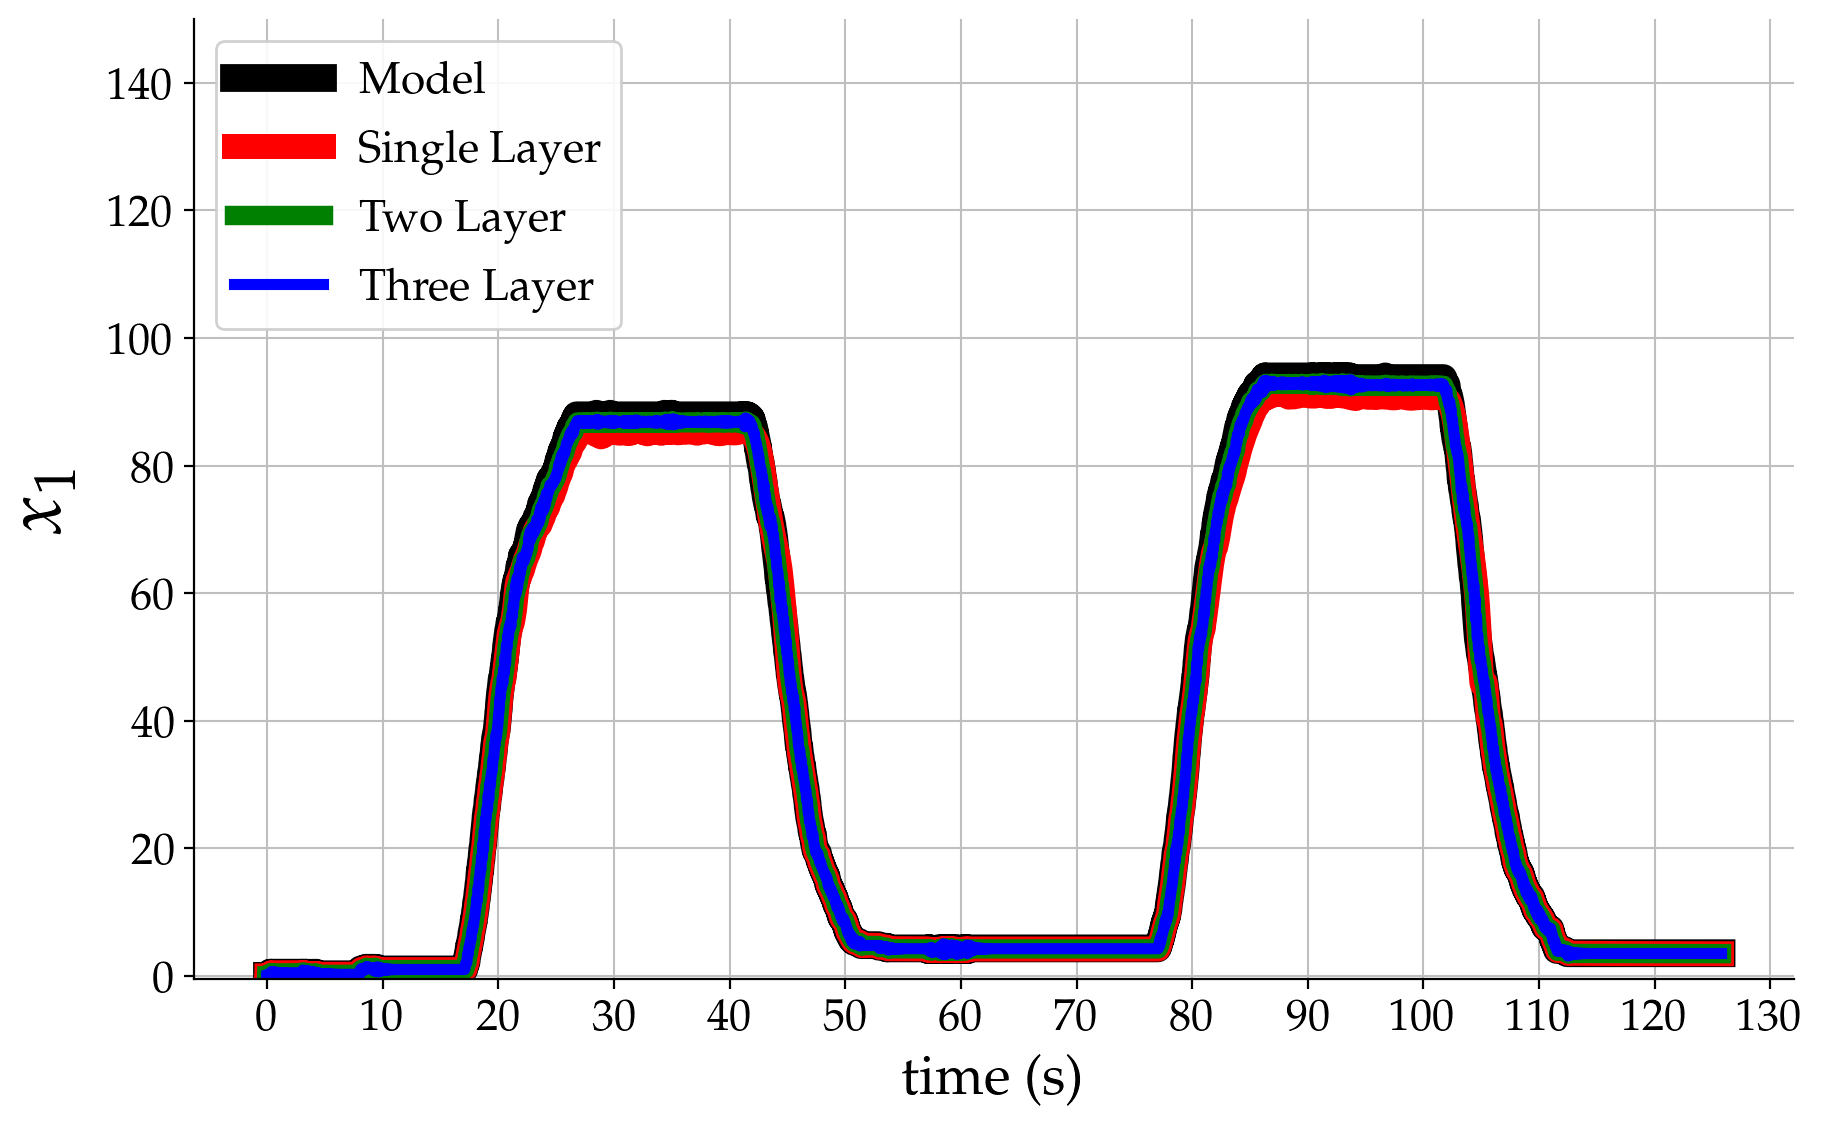

In [39]:
plt.figure(figsize=[10,6],dpi=200)

plt.axes([0.15,0.15,0.8,0.8])
ax = plt.gca()

ax.set_ylabel(r'$x_1$',fontsize=28)
ax.set_xlabel('time (s)',fontsize=20)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

#Different linestyles
plt.plot(Time[0,:-2],X[0,0,2:], 'k',linewidth=10,linestyle='-',label='Model')
plt.plot(Time[0,:-2],xhR1[0,0,2:],'r',linewidth=9,linestyle='-',label='Single Layer')
plt.plot(Time[0,:-2],xhR2[0,0,2:],'g',linewidth=7,linestyle='-',label='Two Layer')
plt.plot(Time[0,:-2],xhR3[0,0,2:],'b',linewidth=4,linestyle='-',label='Three Layer')

#Legend
plt.legend(loc='upper left',frameon=True,fontsize=16,framealpha=0.9)

#Selecte the thicks we are gone to use in the plot
#plt.xticks(np.linspace(0,20,11,endpoint=True))
ax.xaxis.set_major_locator(plt.MultipleLocator(10.0))

ax.grid(which='major', axis='x', linewidth=0.75, linestyle='-', color='0.75')
ax.grid(which='major', axis='y', linewidth=0.75, linestyle='-', color='0.75')
#Change parameters of the axis thicks
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(16)

#plt.xlim(0,20)
plt.ylim(-0.5,150)
######################################################################################
######################################################################################
#plt.axes([0.5,0.6,0.3,0.3])
#ax2 = plt.gca()
#plt.plot(Time[0,:-2],X[0,0,2:], 'k',linewidth=9,linestyle='-',label='Model')
#plt.plot(Time[0,:-2],xhR2[0,0,2:],'g',linewidth=5,linestyle='--',label='Two Layer')
#plt.plot(time[:-1],xhR3[0,0,2:],'b',linewidth=5,linestyle='-.',label='Three Layer')

#ax2.grid(which='major',axis='x',linewidth=0.25,linestyle='-',color='0.75')
#ax2.grid(which='major',axis='y',linewidth=0.25,linestyle='-',color='0.75')

#plt.xlim(0, 1);
#plt.ylim(-0.5,0.7)
#plt.xticks(np.linspace(0,0.5,6,endpoint=True))

#for label in ax2.get_xticklabels() + ax2.get_yticklabels():
#    label.set_fontsize(16)
    #label.set_bbox(dict(facecolor='white', edgecolor='None', alpha=0.65 ))

plt.savefig("IdentificationEMG.eps")
plt.show()

In [40]:
print(np.sum(Loss1))
print(np.sum(Loss2))
print(np.sum(Loss3))
print('\n Single layer')
print(c1R1)
print(c2R1)
print('\nTwo layer')
print('AF')
print(c21R2)
print(c22R2)
print('Alpha')
print(g1R2)
print(g2R2)
print(g12R2)
print(g22R2)
print('Three layer')
print('AF')
print(c1R3)
print(c2R3)
print(c21R3)
print(c22R3)
print('Aplha')
print(g1R3)
print(g2R3)
print(g12R3)
print(g22R3)
print(g13R3)
print(g23R3)

5184.886875075019
2299.092078633726
2133.417953229943

 Single layer
[[-0.12935521]]
[[0.24226767 0.05828419]]

Two layer
AF
[[ 0.15526694]
 [-0.32322194]]
[[ 0.740878   -1.182191  ]
 [ 1.51246975 -1.89044963]]
Alpha
20
20
50
50
Three layer
AF
[[-0.28675144]
 [-0.90864207]]
[[ 0.96630689]
 [-0.11729016]]
[[ 0.00800088 -0.35291736 -0.48051049]
 [-0.22622023  0.6640338   0.47349411]
 [-0.24157887 -0.97396533  0.59480988]
 [-0.4612224   0.16536978 -0.94889812]]
[[ 0.32440404 -0.22495315 -0.0058524 ]
 [-0.17018833 -0.2982562   0.10195581]
 [ 0.94582138 -0.77444757 -0.37348294]
 [-0.91640458  0.47679952  0.31502478]]
Aplha
7
7
100
100
100
100


# New EMG Prediction

## Possibly an implementation of the trained NN for new EMG estimation

         Time  Angles  EMG
0       0.000    0.51   21
1       0.001    0.51   21
2       0.001    0.51   21
3       0.007    0.51   21
4       0.032    0.51   21
...       ...     ...  ...
4431  125.706    0.25   21
4432  125.735    0.25   21
4433  125.766    0.25   21
4434  125.796    0.25   21
4435  125.827    0.25   21

[4436 rows x 3 columns]


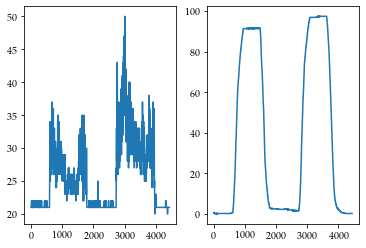

In [253]:
# EMG signals
df = pd.read_excel('DatasetH.xlsx')
print(df)
u = df['EMG'].to_numpy()
u = np.reshape(u,(1,-1))
X = df['Angles'].to_numpy()
X = np.reshape(X,(1,1,-1))
Time = df['Time'].to_numpy()
Time = np.reshape(Time,(1,-1))
_,T = np.shape(Time)
plt.subplot(121)
plt.plot(u[0,:])
plt.subplot(122)
plt.plot(X[0,0,:])
plt.show()
CN=1
U=np.zeros((1,1))

In [256]:
for i in range(2,T-1):
        U[0,0]=u[0,i]
        #Three layer
        ############################################################################################
        X_W13R3= 0.5*(W31R3[:,:,i+1]+W31R3[:,:,i])@xhR3[:,:,i]
        X_W23R3= 0.5*(W32R3[:,:,i+1]+W32R3[:,:,i])@xhR3[:,:,i]
        X_W12R3= 0.5*(W21R3[:,:,i+1]+W21R3[:,:,i])@functionSigma(X_W13R3,nn21R3b,c21R3)
        X_W22R3= 0.5*(W22R3[:,:,i+1]+W22R3[:,:,i])@functionSigma(X_W23R3,nn22R3b,c22R3)
        xhR3[:,:,i+1] = (A3@xhR3[:,:,i] + 0.5*(W1R3[:,:,i+1]+W1R3[:,:,i])@functionSigma(X_W12R3,nn1R3,c1R3)
                       + 0.5*(W2R3[:,:,i+1]+W2R3[:,:,i])@functionPhi(X_W22R3,nn2R3,1,c2R3)@U)

        


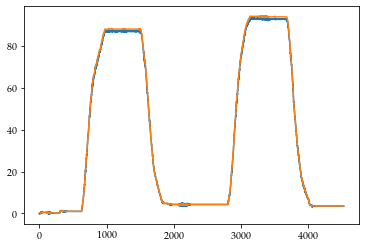

In [257]:
plt.plot(xhR3[0,0,:])
plt.plot(X[0,0,:])
plt.show()

In [255]:
print((max(Loss1)/max(X[0,0,:]))*100)
print((max(Loss2)/max(X[0,0,:]))*100)
print((max(Loss3)/max(X[0,0,:]))*100)

4.865267372632288
2.3436602438394685
2.1257660740141033


In [26]:
del time